# Proposed SpatialReference and ModelGrid classes.

## Concept: 

1. SpatialReference can be stand alone or instantiated with a model grid
2. SpatialReference has a focus on translating data instead of generating model grids
3. ModelGrid class has an attached SpatialReference (either user provided or instantiated by the class)
4. Both classes must be lightweight, cache data, and update dynamically if a user changes a boundary condition of the ModelGrid or SpatialReference


In [1]:
%matplotlib inline
import os
import flopy as fp
import numpy as np
from proposed_mg import StructuredModelGrid
from proposed_vertex_mg import VertexModelGrid
from proposed_sr import SpatialReference
import matplotlib.pyplot as plt

###  Let's start with the SpatialReference! 

The user should provide an xoffset, yoffset, and/or rotation. Any or all of these can be provided as they will default to zero if the user does not provide one. 

Additionally the user can select `origin_location` by using the argument `origin_location=`. Valid values are "ul" and "ll" for upper-left and lower-left corners.

In [2]:
sr = SpatialReference(xoffset=10, yoffset=10, rotation=-45)

In [3]:
print("xoffset=", sr.xoffset)
print("yoffset=", sr.yoffset)
print("rotation=", sr.rotation)
print("origin_location=", sr.origin_location)

xoffset= 10
yoffset= 10
rotation= -45
origin_location= ll


### Now let's use SpatialReference to transform a single point

In [4]:
x = 1
y = 1
sr.transform(x, y)

(11.414213562373096, 10.0)

The `transform()` method can also be used to transform array data. Both one and two dimensional arrays can be transformed. 

In [5]:
x = np.arange(10) * 20.
y = np.arange(10) * 2.
sr.transform(x, y)

(array([ 10.        ,  25.55634919,  41.11269837,  56.66904756,
         72.22539674,  87.78174593, 103.33809512, 118.8944443 ,
        134.45079349, 150.00714267]),
 array([  10.        ,   -2.72792206,  -15.45584412,  -28.18376618,
         -40.91168825,  -53.63961031,  -66.36753237,  -79.09545443,
         -91.82337649, -104.55129855]))

### Let's create a Structured ModelGrid and really expand on the functionality of these classes

All that is required to create a structured model grid is `delc` and `delr` arrays. Other optional parameters will be coved later in the notebook!

In [6]:
delc = np.ones((15,)) * 10
delr = np.ones((25,)) * 10

mg = StructuredModelGrid(delc, delr)

Now that a ModelGrid has been created; there are a number of important property methods that we can use.

1. `extent` : Returns the model grid exent as a tuple of xmin, xmax, ymin, ymax
2. `xcenters`: Returns an array of x coordinates of the model grid cell centers
3. `ycenters`: Returns an array of y coordinates of the model grid cell centers
4. `xgrid`: Returns an array of x coordinates of the model grid verticies
5. `ygrid`: Returns an array of y coordinates of the model grid verticies
6. `grid_lines`: Returns an array of grid lines for the model grid


In [7]:
print("Extent:", mg.extent)
print("xcenters:", mg.xcenters)
print("ycenters:", mg.ycenters)
print("xgrid:", mg.xgrid)
print("ygrid:", mg.ygrid)
print("grid_lines:", mg.grid_lines)

Extent: (0.0, 250.0, 0.0, 150.0)
xcenters: [[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105. 115. 125. 135.
  145. 155. 165. 175. 185. 195. 205. 215. 225. 235. 245.]
 [  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105. 115. 125. 135.
  145. 155. 165. 175. 185. 195. 205. 215. 225. 235. 245.]
 [  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105. 115. 125. 135.
  145. 155. 165. 175. 185. 195. 205. 215. 225. 235. 245.]
 [  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105. 115. 125. 135.
  145. 155. 165. 175. 185. 195. 205. 215. 225. 235. 245.]
 [  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105. 115. 125. 135.
  145. 155. 165. 175. 185. 195. 205. 215. 225. 235. 245.]
 [  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105. 115. 125. 135.
  145. 155. 165. 175. 185. 195. 205. 215. 225. 235. 245.]
 [  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105. 115. 125. 135.
  145. 155. 165. 175. 185. 195. 205. 215. 225. 235. 245.]
 [  5.  15.  25.  35.  45.  55.  65.  75.  85. 

Spatially the model grid centers look like

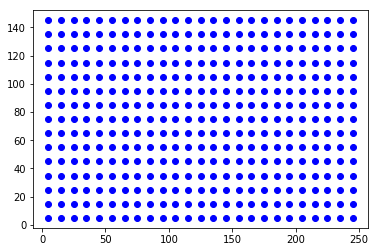

In [8]:
plt.scatter(np.ravel(mg.xcenters), np.ravel(mg.ycenters), c='b')

and adding in the model grid vertices the data look like

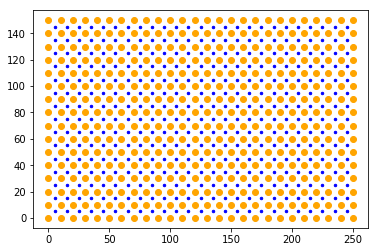

In [9]:
plt.scatter(np.ravel(mg.xgrid), np.ravel(mg.ygrid), c="orange")
plt.scatter(np.ravel(mg.xcenters), np.ravel(mg.ycenters), s=6, c='b')

Better yet, we can plot the ModelGrid in model coordinates with a simple function call

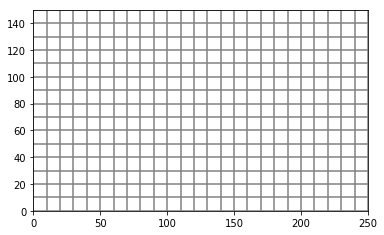

In [10]:
mg.plot_grid_lines()

Also attached to the ModelGrid SpatialReference object, which allows us to translate the model grid. One way to set the spatial reference information is to set the `ModelGrid.sr` attributes

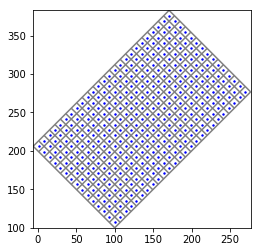

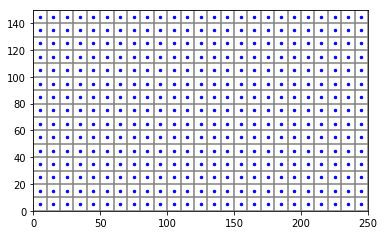

In [11]:
mg.sr.xoffset = 100
mg.sr.yoffset = 100
mg.sr.rotation = 45
mg.sr.plot_grid_lines()
plt.scatter(np.ravel(mg.sr.xcenters), np.ravel(mg.sr.ycenters), s=2, c='b')

plt.show()
mg.plot_grid_lines()
plt.scatter(np.ravel(mg.xcenters), np.ravel(mg.ycenters), s=6, c="b")

### We can also generate a new SpatialReference and attach it to the ModelGrid!

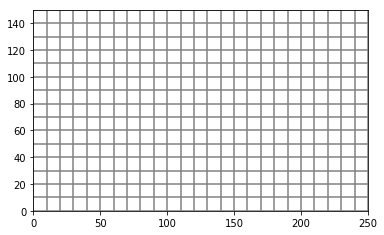

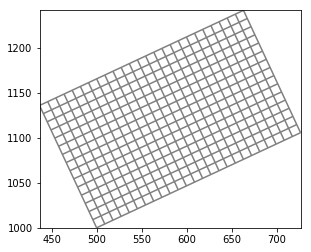

In [12]:
sr = SpatialReference(xoffset=500, yoffset=1000, rotation=25)
mg.sr = sr
mg.plot_grid_lines()
plt.show()
mg.sr.plot_grid_lines()

Or we can generate a new ModelGrid object and pass it SpatialReference information

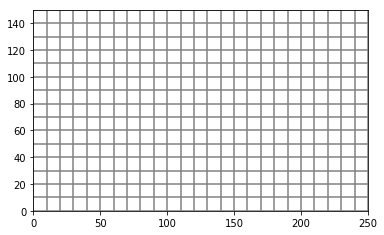

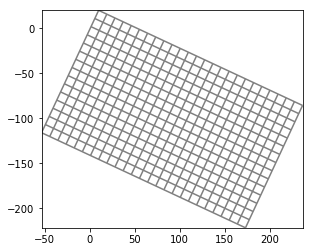

In [13]:
mg = StructuredModelGrid(delc, delr, xoffset=10, yoffset=20, 
                         rotation=-25, origin_location="ul")
mg.plot_grid_lines()
plt.show()
mg.sr.plot_grid_lines()

If the user only wants to work with translated model grids, they can pass a model grid to a fresh SpatialReference

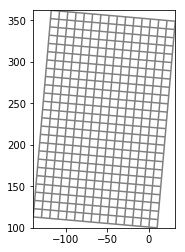

In [14]:
mg = StructuredModelGrid(delc, delr)
sr = SpatialReference(xoffset=10, yoffset=100, rotation=85, model_grid=mg)
sr.plot_grid_lines()


### Caution: The user cannot work with the model grid (in model coordinates) through a SpatialReference

Only the ModelGrid classes allow the user to access both Model coordinates and SpatialReference information! If a user tries to access the model_grid through a SpatialReference instance an error message is displayed.

In [15]:
sr.model_grid

AttributeError: 'SpatialReference' object has no attribute 'model_grid'

## Working with Vertex Model Grids (DISV)

The proposed ModelGrid structure can also handle Vertex based grids with ease! 

Let's load an example problem! The only required arguments are `verticies` and `cell2d`

Directory structure already exists for simulation path C:\Users\jlarsen\Desktop\flopy-ogw\trunk\flopy\proposed_grid\..\..\examples\data\mf6\test003_gwfs_disv
loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package disv...
    loading package ic...
    loading package npf...
    loading package chd...
    loading package chd...
    loading package oc...
  loading ims package gwf_1...


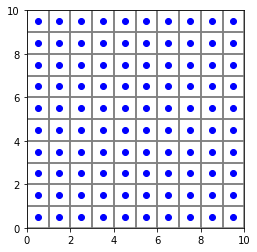

In [16]:
ws = "../../examples/data/mf6/test003_gwfs_disv"
name = "mfsim.nam"

sim = fp.mf6.modflow.MFSimulation.load(sim_name=name, sim_ws=ws)
ml = sim.get_model("gwf_1")
dis = ml.dis

mg = VertexModelGrid(dis.vertices, dis.cell2d,
                     top=dis.top, botm=dis.botm)
mg.plot_grid_lines()
plt.scatter(np.ravel(mg.xcenters), np.ravel(mg.ycenters), c="b")

Now let's re-generate the model grid with some new SpatialReference information

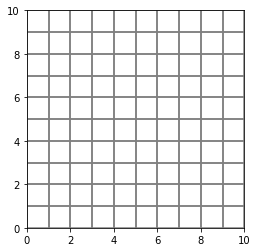

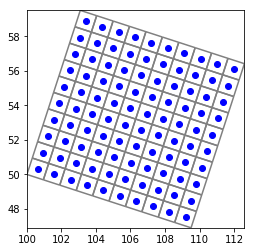

In [17]:
sr = SpatialReference(xoffset=100, yoffset=50, rotation=-18)
mg = VertexModelGrid(dis.vertices, dis.cell2d, sr=sr)

mg.plot_grid_lines()
plt.show()
mg.sr.plot_grid_lines()
plt.scatter(mg.sr.xcenters, mg.sr.ycenters, c="b")